## Graphical Gaussian model for Jones et al (2005)  Example 2. (p=15)

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import seaborn as sns

from parallelDG.graph import trajectory
import parallelDG.graph.graph as glib
import parallelDG.graph.decomposable as dlib
import parallelDG.mh_parallel as pdg
import parallelDG.auxiliary_functions as aux
from networkx.drawing.nx_pydot import graphviz_layout
from parallelDG.auxiliary_functions import hash_graph
sns.set_style("whitegrid")
options = {
    "font_size": 12,
    "node_size": 1000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
}


## 15 vertex structural dependence graph

In [2]:
## Jones et. al.(2005) example 1, p = 15, 
G = nx.Graph()
G.add_nodes_from(range(15))
G.add_edges_from([(0, 11), (0, 7), (1, 8), (1, 6), (2, 4), (3, 8), (3, 9),
                             (3, 10), (3, 4), (3, 6), (4, 6), (4, 8), (4, 9), (4, 10),
                             (5, 10), (5, 6), (6, 8), (6, 9), (6, 10), (7, 11), (8, 9),
                             (8, 10), (8, 11), (9, 10), (10, 11), (12, 13)])

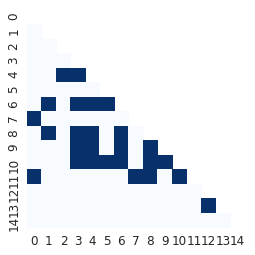

In [3]:
# heatmap
aux.plot_heatmap(nx.to_numpy_array(G))
plt.show()

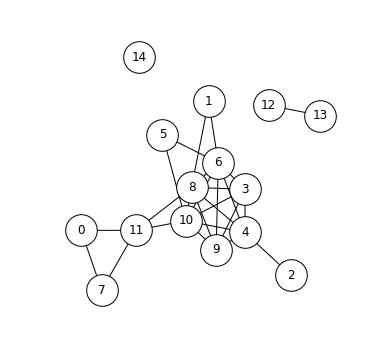

In [4]:
# Graph
plt.figure(figsize=(6,6))
pos = graphviz_layout(G, prog="neato")
nx.draw_networkx(G,pos=pos, ith_labels=True, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [6]:
# Jones et al(2005) Example 2 data
df = pd.read_csv('../sample_data/jones2005_example1_p15.txt',header=None,sep = ' ')

###  Gaussian Graphical model with uniform graph prior

In [7]:
# MH-parallel sampler
n = 250
p = 15
delta = 3.0
tau = 0.0004
burnin = 50000
np.random.seed(1)
jones = pdg.sample_trajectory_ggm(dataframe=df, 
                                  n_samples=100000,
                                  randomize=100,
                                  D = np.cov(df),
                                  graph_prior = ['uniform'], #['mbc', 2.0, 4.0],
                                  delta =p)


Parallel Metropolis-Hastings samples: 100%|██████████| 99999/99999 [00:07<00:00, 13610.49it/s]

Total of 155767 updates, for an average of 1.56 per iteration or 21183.53updates/sec
Acceptance rate 0.0312


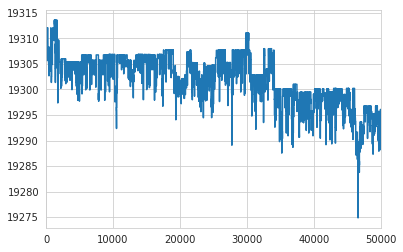

In [8]:
jones.log_likelihood(burnin).plot()

mcmc_index


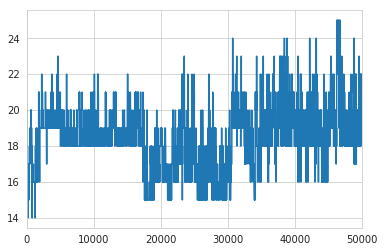

In [9]:
jones.size(burnin).plot();

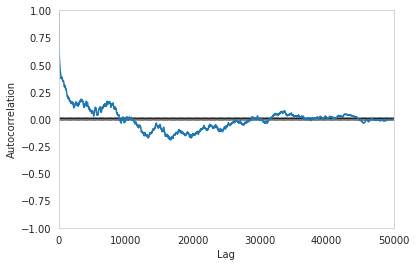

In [10]:
autocorrelation_plot(jones.size(burnin));

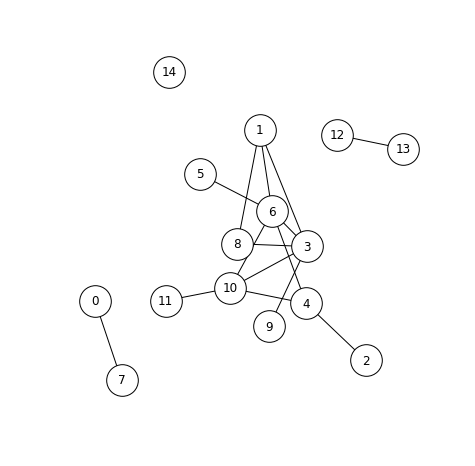

In [11]:
plt.figure(figsize=(6,6))
nx.draw(jones.maximum_likelihood_graph(),
        pos = pos, 
        with_labels=True, 
       **options)
# Set margins for the axes so that nodes aren't clipped

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()





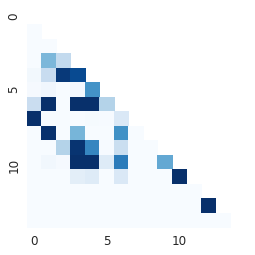

In [12]:
aux.plot_heatmap(jones.empirical_distribution(burnin).heatmap(), xticklabels=5, yticklabels=5)